In [2]:
import pandas as pd
import numpy as np

# 구글 우울증 검색량 예측

In [3]:
우울 = pd.read_csv('우울증 검색어.csv',encoding = 'UTF-8')

In [4]:
우울 = 우울.reset_index()
우울.columns = ['월','빈도']
우울 = 우울.iloc[1:]

In [5]:
우울['빈도'] = 우울['빈도'].astype('float')

In [6]:
from neuralprophet import NeuralProphet, set_log_level
set_log_level("ERROR")

C:\Users\WINCE\anaconda3\lib\site-packages\plotly_resampler\aggregation\aggregators.py:25: UserWarning: Could not import lttbc; will use a (slower) python alternative.
  warnings.warn("Could not import lttbc; will use a (slower) python alternative.")


In [7]:
우울['빈도'].describe()

count    241.000000
mean      23.514523
std       10.095832
min        0.000000
25%       18.000000
50%       21.000000
75%       28.000000
max      100.000000
Name: 빈도, dtype: float64

In [8]:
#train test split
cutoff = "2023-01"
train_df = 우울[우울['월']<cutoff]
test_df = 우울[우울['월']>=cutoff]

In [9]:
#전용 train, test 데이터 생성
train = pd.DataFrame({"ds": train_df["월"], "y": train_df["빈도"]})
test = pd.DataFrame({"ds": test_df["월"], "y": test_df["빈도"]})
#모델 설정
m = NeuralProphet(
    learning_rate=0.1, 
)
#모델 학습
metrics = m.fit(train, freq="m")

Training: 0it [00:00, ?it/s]

In [10]:
#학습 데이터셋 예측 결과 시각화
train_pred = m.predict(train)
#fig = m.plot(train_pred)
fig1 = m.plot(train_pred[-17*12:])
fig2 = m.plot(train_pred[-1*12:])
#comp = m.plot_components(train_pred)
param = m.plot_parameters()

Predicting: 15it [00:00, ?it/s]

In [12]:
#테스트 데이터셋 예측 결과 시각화
test_pred = m.predict(test)
#fig = m.plot(test_pred)
fig12 = m.plot(test_pred[-19*12:])
fig22 = m.plot(test_pred[-3*12:])
#comp = m.plot_components(test_pred)
param2 = m.plot_parameters()

Predicting: 15it [00:00, ?it/s]

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

col = "빈도"

#학습 데이터셋 검증
pred2 = train_pred["y"]
test2 = train_pred['yhat1']
print("============== {} Evaluate Result============".format(col))
print("MAE :", mean_absolute_error(test2, pred2))
print("MSE :", mean_squared_error(test2, pred2))
print("RMSE :", (mean_squared_error(test2, pred2))**2)
print("MAPE :", mean_absolute_percentage_error(test2, pred2))

WARNING - (py.warnings._showwarnmsg) - C:\Users\WINCE\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning:

A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5




============== 빈도 Evaluate Result============
MAE : 3.130012265422888
MSE : 21.58544989812174
RMSE : 465.93164730432386
MAPE : 0.15472830225042541


# 네이버 우울증 테스트 검색량 예측

In [15]:
from neuralprophet import NeuralProphet, set_log_level
set_log_level("ERROR")

# 데이터 불러오기

우울증테스트 = pd.read_excel('네이버 우울증 테스트.xlsx')

# 컬럼의 이름을 용이하게 바꿔줌
우울증테스트.columns = ['ds','y']

# 시간 데이터를 datetime으로 변경

우울증테스트['ds'] = pd.to_datetime(우울증테스트['ds'],format = '%Y-%m-%d')

우울증테스트.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2922 entries, 0 to 2921
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      2922 non-null   datetime64[ns]
 1   y       2922 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 45.8 KB


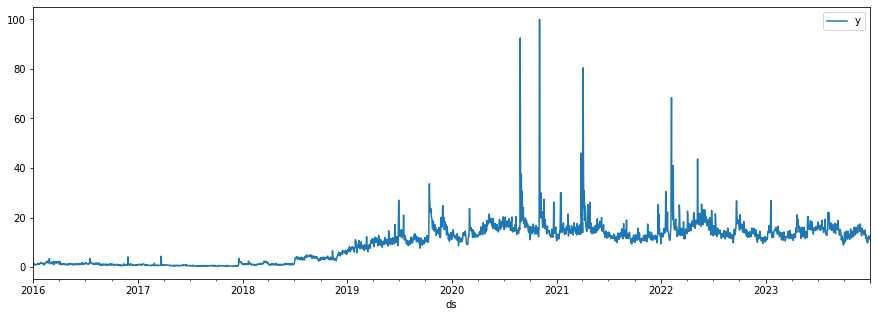

In [16]:
plt = 우울증테스트.plot(x="ds", y="y", figsize=(15, 5))

In [17]:
df_train, df_val = m.split_df(우울증테스트, valid_p=0.2)

print("Dataset size:", len(우울증테스트))
print("Train dataset size:", len(df_train))
print("Validation dataset size:", len(df_val))

Dataset size: 2922
Train dataset size: 2338
Validation dataset size: 584


In [18]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2338 entries, 0 to 2337
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      2338 non-null   datetime64[ns]
 1   y       2338 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 36.7 KB


In [28]:
우울증테스트['y'].describe()

count    2922.000000
mean        9.676000
std         7.772914
min         0.298270
25%         1.369120
50%        11.532435
75%        14.711987
max       100.000000
Name: y, dtype: float64

Finding best initial lr:   0%|          | 0/234 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Predicting: 74it [00:00, ?it/s]

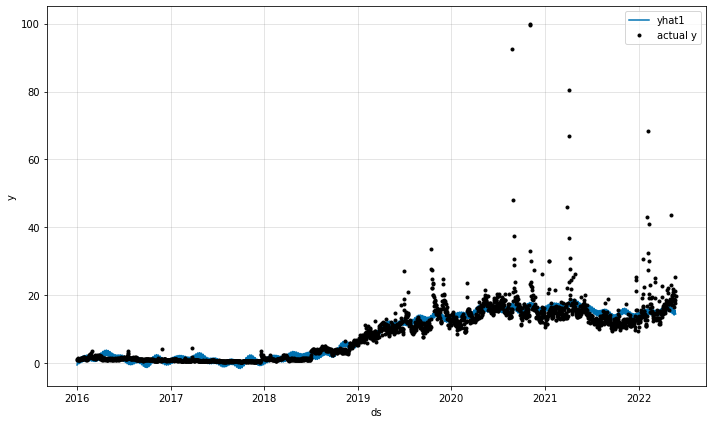

In [19]:
# 모델 불러오기
m = NeuralProphet(

    n_changepoints=10,
    
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False
)

# NeuralProphet 모델의 플로팅 백엔드를 설정하는 메서드. 플로팅 백엔드는 모델이 시각화하는 데 사용되는 라이브러리를 지정
m.set_plotting_backend("matplotlib")

# 모델 적용
metrics = m.fit(df_train, validation_df=df_val)

# 예측
forecast = m.predict(df_train)

# 예측한 그래프
m.plot(forecast)

In [20]:
metrics

,MAE_val,RMSE_val,Loss_val,RegLoss_val,epoch,MAE,RMSE,Loss,RegLoss
0,28.759153,33.702595,1.093641,0.0,0,22.280155,27.474699,0.634865,0.0
1,27.007124,31.734449,1.003708,0.0,1,21.266630,26.228245,0.596612,0.0
2,24.712675,29.150513,0.886203,0.0,2,19.960596,24.677917,0.541687,0.0
3,21.611361,25.586073,0.728890,0.0,3,18.105019,22.617231,0.472457,0.0
4,17.499073,20.857841,0.527626,0.0,4,15.535995,19.500383,0.373414,0.0
...,...,...,...,...,...,...,...,...,...
146,2.397041,3.234039,0.014903,0.0,146,1.770795,3.274181,0.016688,0.0
147,2.402300,3.240455,0.014962,0.0,147,1.794436,3.253605,0.016812,0.0
148,2.410427,3.251164,0.015061,0.0,148,1.784444,3.329021,0.016721,0.0
149,2.411753,3.252831,0.015076,0.0,149,2.068333,3.673732,0.029487,0.0


Predicting: 74it [00:00, ?it/s]

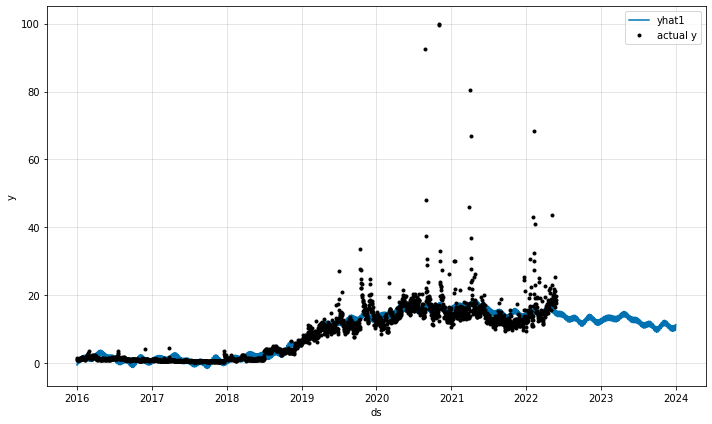

In [21]:
# Create a new dataframe reaching 365 into the future for our forecast, n_historic_predictions also shows historic data
df_future = m.make_future_dataframe(df_train, n_historic_predictions=True, periods=584)

# Predict the future
forecast = m.predict(df_future)

# Visualize the forecast
m.plot(forecast)

In [22]:
from sklearn.metrics import mean_absolute_error 

# 실제 값과 예측 값
y_true = 우울증테스트.loc[2338:,'y']
y_pred = forecast.loc[2338:,'yhat1']  

# MAE 계산
mae = mean_absolute_error(y_true, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')



Mean Absolute Error (MAE): 2.4104150659602968


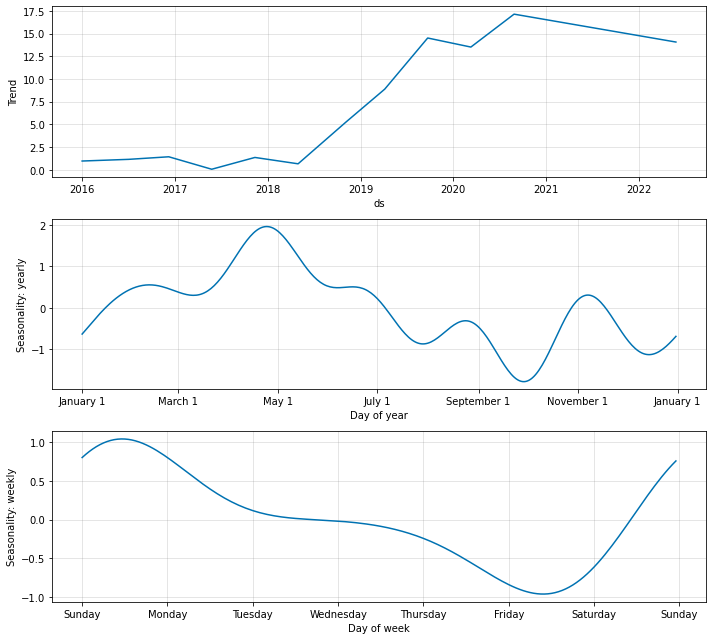

In [23]:
m.plot_parameters(components=["trend", "seasonality"])

## 모델 검증 및 재현성

Predicting: 74it [00:00, ?it/s]

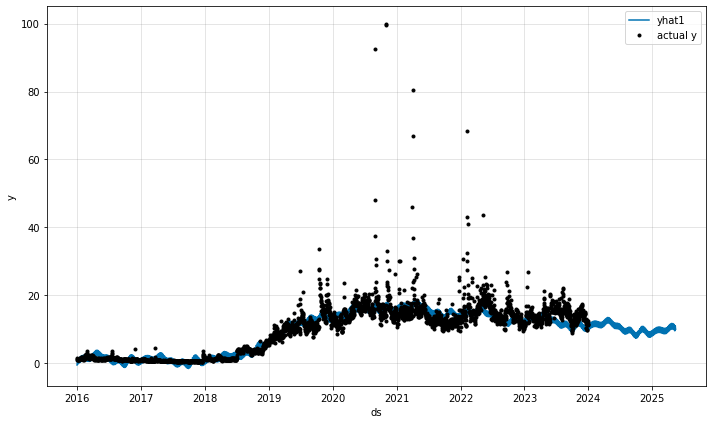

In [24]:
# Create a new dataframe reaching 365 into the future for our forecast, n_historic_predictions also shows historic data
df_future = m.make_future_dataframe(우울증테스트, n_historic_predictions=True, periods=500)

# Predict the future
forecast = m.predict(df_future)

# Visualize the forecast
m.plot(forecast)